# Microsoft Movie Studio Market Analysis and Strategy for Success

## Project Overview.

For this project, I will use exploratory data analysis to generate insights for a business stakeholder.

Business Problem

Microsoft is taking notice of major corporations producing their own unique video content and aims to join the excitement. With limited knowledge in the realm of filmmaking, Microsoft has made the decision to establish a fresh movie studio. Our responsibility is to delve into the current trends of successful films in terms of box office performance. We will then transform these discoveries into practical recommendations for the head of Microsoft's newly established movie studio, aiding them in determining the most suitable genres for their film projects.

Project Description: 

Analyzing Box Office Success for Microsoft's New Movie Studio.

Objective:

Microsoft aims to enter the film industry by creating a new movie studio. However, lacking expertise in movie production, they need to understand the types of films that are currently performing well at the box office. The objective of this project is to explore and analyze the factors contributing to the success of movies, providing actionable insights for Microsoft's decision-making in film production.

# UNDERSTANDING AND ANALYSIS OF THE DATA

By analyzing the market trends and identifying the key factors contributing to the success of movies, 
the project aims to guide Microsoft in developing a successful strategy for their entry into the movie industry.

The datasets used are from Box Office Mojo, IMDB, Rotten Tomatoes, TheMovieDB and The Numbers.

im.db

The IMDB dataset contains IMDB ratings for movies in the United States.

bom.movie_gross.csv

The Box Office Mojo dataset contains gross revenues for movies in the United States and foreign market.

tmdb.movies.csv

The Moringa School has provided us with this dataset.

It contains Information regarding the domestic and international gross profits of movies, as well as the production studio name and release year.

tn.movie_budgets.csv

The Number dataset has been provided to us by the Moringa School. *

It contains data regarding the production budget, release date, domestic gross, and worldwide gross of movies.

## Importing the necessary libraries

In [1]:
#Imported the necessary libraries for data manipulation, SQLite database connection,
# numerical operations, CSV handling, and plotting using matplotlib.
import pandas as pd
import sqlite3
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Establishing a connection to an SQLite database named "im.db" using the sqlite3 library.

In [2]:
#Establishing a connection to an SQLite database named "im.db" using the sqlite3 library.
conn = sqlite3.connect("im.db")

## Reading the data

Reading data from movie_basics table.

In [3]:
#Executed an SQL query to select all rows from the "movie_basics" table in the SQLite database
# and stored the results in a pandas DataFrame named movie_basics_df.
query = "SELECT * FROM movie_basics "
movie_basics_df = pd.read_sql_query(query, conn)

Reading data from music_ratings table.

In [4]:
#Executing a SQL query to retrieve data from a table named "movie_ratings"
# and storing the result in a Pandas DataFrame called "movie_ratings_df"
query = "SELECT * FROM movie_ratings "
movie_ratings_df = pd.read_sql_query(query, conn)

Reading data from bom.movie_gross.csv

In [5]:
#Load Box office movies data
bom_movie_df = pd.read_csv("bom.movie_gross.csv")

Reading data from tn.movie_budgets.csv

In [6]:
#Loading The number data
movie_budgets_df = pd.read_csv("tn.movie_budgets.csv")

Joining movie_basics and movie_ratings tables

In [7]:
# Joining movie_basics and movie_ratings tables
query = """
SELECT *
FROM movie_ratings
JOIN movie_basics ON movie_ratings.movie_id = movie_basics.movie_id
"""
movie_basic_and_rating_df = pd.read_sql_query(query, conn)

Renaming a column in bom_movie_df to enable it to be used to join it to movie_basic_and_rating_df

In [8]:
bom_movie_df = bom_movie_df.rename(columns={"title": "primary_title"})

In [9]:
# Merge the dataframes based on the "title" column
bom_movie_basic_and_rating_df = pd.merge(movie_basic_and_rating_df, bom_movie_df, on="primary_title", how="inner")

Checking the Data for null values and NaN values

In [10]:
# viewing contents of movie_budgets_df head
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [11]:
# viewing contents of movie_budgets_df
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [12]:
# viewing the head in bom_movie_basic_and_rating_df

bom_movie_basic_and_rating_df.head()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,year
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",LG/S,18800000.0,42400000,2014
1,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,FoxS,21600000.0,887000,2013
2,tt1181840,7.0,5494,Jack and the Cuckoo-Clock Heart,Jack et la mécanique du coeur,2013,94.0,"Adventure,Animation,Drama",Shout!,NaN,3400000,2014
3,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",Sony,75600000.0,34600000,2011
4,tt1212419,6.5,87288,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance",WB,32700000.0,72500000,2010


In [13]:
# viewing the tail in bom_movie_basic_and_rating_df
bom_movie_basic_and_rating_df.tail()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,year
3022,tt3399916,6.3,4185,The Dead Lands,The Dead Lands,2014,107.0,"Action,Adventure",Magn.,5200.0,NaN,2015
3023,tt3616916,6.7,28167,The Wave,Bølgen,2015,105.0,"Action,Drama,Thriller",Magn.,177000.0,NaN,2016
3024,tt3748512,7.4,4977,Hitchcock/Truffaut,Hitchcock/Truffaut,2015,79.0,Documentary,Cohen,260000.0,NaN,2015
3025,tt7008872,7.0,18768,Boy Erased,Boy Erased,2018,115.0,"Biography,Drama",Focus,6800000.0,5000000,2018
3026,tt7048622,7.7,11168,The Insult,L'insulte,2017,113.0,"Crime,Drama,Thriller",Cohen,1000000.0,NaN,2018


In [14]:
# checking for differences in the start_year and year column
start_year_mismatch = bom_movie_basic_and_rating_df[~bom_movie_basic_and_rating_df['start_year'].isin(bom_movie_basic_and_rating_df['year'])]
print(start_year_mismatch[['start_year', 'year']])

      start_year  year
40          2019  2016
201         2019  2010
225         2019  2014
238         2019  2015
311         2019  2010
319         2019  2011
326         2019  2011
380         2019  2015
469         2019  2017
635         2019  2010
733         2019  2013
2683        2019  2010


In [15]:
#viewing contents of bom_movie_basic_and_rating_df
bom_movie_basic_and_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3027 entries, 0 to 3026
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         3027 non-null   object 
 1   averagerating    3027 non-null   float64
 2   numvotes         3027 non-null   int64  
 3   primary_title    3027 non-null   object 
 4   original_title   3027 non-null   object 
 5   start_year       3027 non-null   int64  
 6   runtime_minutes  2980 non-null   float64
 7   genres           3020 non-null   object 
 8   studio           3024 non-null   object 
 9   domestic_gross   3005 non-null   float64
 10  foreign_gross    1832 non-null   object 
 11  year             3027 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 283.9+ KB


# Data Cleaning and Preprocessing:

Cleaning the collected data, handling missing values, removing outliers, and ensuring data consistency.

In [16]:
# calculate the sum of null values
bom_movie_basic_and_rating_df.isnull().sum()

movie_id              0
averagerating         0
numvotes              0
primary_title         0
original_title        0
start_year            0
runtime_minutes      47
genres                7
studio                3
domestic_gross       22
foreign_gross      1195
year                  0
dtype: int64

In [17]:
# Filling the missing or NaN values in the "runtime_minutes" column of the DataFrame "bom_movie_basic_and_rating_df"
# with the mean runtime value stored in the variable "mean_runtime".
mean_runtime = bom_movie_basic_and_rating_df["runtime_minutes"].mean()
bom_movie_basic_and_rating_df["runtime_minutes"].fillna(mean_runtime, inplace=True)

# Check for NaN values in the "runtime_minutes" column
nan_runtimes = bom_movie_basic_and_rating_df['runtime_minutes'].isnull().sum()

# Print the number of NaN values
print("Number of NaN runtime values:", nan_runtimes)



Number of NaN runtime values: 0


In [18]:
# Filling the missing or NaN values in the "genres" column of the DataFrame "movie_basics_df" with the string value "Unknown".
bom_movie_basic_and_rating_df["genres"].fillna("Unknown", inplace=True)

In [19]:
# Convert non-numeric values to NaN
bom_movie_basic_and_rating_df["foreign_gross"] = pd.to_numeric(bom_movie_basic_and_rating_df["foreign_gross"], errors="coerce")

# Calculate the mean excluding NaN values
mean_foreign_gross = bom_movie_basic_and_rating_df["foreign_gross"].mean(skipna=True)

# Fill NaN values with the mean
bom_movie_basic_and_rating_df.dropna(subset=['foreign_gross'], inplace=True)
bom_movie_basic_and_rating_df.sample(n=10)

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,year
2276,tt3623726,5.9,20932,Ricki and the Flash,Ricki and the Flash,2015,101.0,"Comedy,Drama,Music",TriS,26800000.0,14500000.0,2015
2737,tt1523483,5.7,11858,Kaboom,Kaboom,2010,86.0,"Comedy,Mystery,Romance",IFC,119000.0,421000.0,2011
2647,tt1690953,7.4,344230,Despicable Me 2,Despicable Me 2,2013,98.0,"Adventure,Animation,Comedy",Uni.,368100000.0,602700000.0,2013
109,tt1229340,6.3,156116,Anchorman 2: The Legend Continues,Anchorman 2: The Legend Continues,2013,119.0,Comedy,Par.,125200000.0,46300000.0,2013
681,tt1961562,4.6,50,The House,The House,2011,109.0,"Drama,Mystery,Thriller",WB (NL),25600000.0,8600000.0,2017
2440,tt1542852,6.9,7084,Carancho,Carancho,2010,107.0,"Crime,Drama,Romance",Strand,85500.0,3900000.0,2011
586,tt3707106,5.3,16206,By the Sea,By the Sea,2015,122.0,"Drama,Romance",Uni.,538000.0,2800000.0,2015
903,tt1450321,7.1,93591,Filth,Filth,2013,97.0,"Comedy,Crime,Drama",Magn.,34400.0,8300000.0,2014
217,tt2582782,7.6,176469,Hell or High Water,Hell or High Water,2016,102.0,"Action,Crime,Drama",LGF,27000000.0,10900000.0,2016
2823,tt2401878,7.3,58010,Anomalisa,Anomalisa,2015,90.0,"Animation,Comedy,Drama",Par.,3800000.0,1900000.0,2015


In [20]:
bom_movie_basic_and_rating_df["studio"].fillna("Unknown", inplace=True)

In [21]:
mean_domestic_gross = bom_movie_basic_and_rating_df["domestic_gross"].mean()
bom_movie_basic_and_rating_df.dropna(subset=['domestic_gross'], inplace=True)

In [22]:
bom_movie_basic_and_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1806 entries, 0 to 3025
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         1806 non-null   object 
 1   averagerating    1806 non-null   float64
 2   numvotes         1806 non-null   int64  
 3   primary_title    1806 non-null   object 
 4   original_title   1806 non-null   object 
 5   start_year       1806 non-null   int64  
 6   runtime_minutes  1806 non-null   float64
 7   genres           1806 non-null   object 
 8   studio           1806 non-null   object 
 9   domestic_gross   1806 non-null   float64
 10  foreign_gross    1806 non-null   float64
 11  year             1806 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 183.4+ KB


Viewing random rows to confirm the data is cleaned

In [23]:
random_rows = bom_movie_basic_and_rating_df.sample(n=10)
random_rows

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,year
2737,tt1523483,5.7,11858,Kaboom,Kaboom,2010,86.0,"Comedy,Mystery,Romance",IFC,119000.0,421000.0,2011
177,tt1680679,7.0,2619,Breathing,Atmen,2011,94.0,Drama,KL,4600.0,803000.0,2012
1120,tt1222817,5.2,52396,Zookeeper,Zookeeper,2011,102.0,"Comedy,Family,Romance",Sony,80400000.0,89500000.0,2011
807,tt2025690,6.8,55981,The Finest Hours,The Finest Hours,2016,117.0,"Action,Drama,History",BV,27600000.0,24500000.0,2016
2666,tt2379318,6.3,1449,Bright Days Ahead,Les beaux jours,2013,94.0,"Drama,Romance",Trib.,21800.0,1400000.0,2014
39,tt0985694,6.6,182320,Machete,Machete,2010,105.0,"Action,Crime,Thriller",Fox,26600000.0,17500000.0,2010
2753,tt3682448,7.6,263004,Bridge of Spies,Bridge of Spies,2015,142.0,"Drama,History,Thriller",BV,72300000.0,93200000.0,2015
2520,tt4686844,7.2,63156,The Death of Stalin,The Death of Stalin,2017,107.0,"Comedy,Drama,History",IFC,8000000.0,16600000.0,2018
2849,tt1545759,6.8,12706,Point Blank,À bout portant,2010,81.0,"Action,Crime,Drama",Magn.,708000.0,8500000.0,2011
2429,tt1135084,6.2,53377,Takers,Takers,2010,107.0,"Action,Crime,Thriller",SGem,57700000.0,11300000.0,2010


In [24]:
#Counting the number of null values in each column of the DataFrame movie_basics_df
null_counts = bom_movie_basic_and_rating_df.isnull().sum()
null_counts

movie_id           0
averagerating      0
numvotes           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
studio             0
domestic_gross     0
foreign_gross      0
year               0
dtype: int64

Removing outliers in runtime minutes and start year.

As per the guidelines set by the Academy of Motion Picture Arts and Sciences, a short film is defined as having a duration of 40 minutes or less, while a feature film exceeds this length. This criterion effectively filters out movies that are excessively brief, making it a valuable rule.

In [25]:
#Filtering the movie_basics_df DataFrame based on the conditions that the "runtime_minutes" column should be less than or equal to 3600
# and the "start_year" column should be less than or equal to 2023.
bom_movie_basic_and_rating_df = bom_movie_basic_and_rating_df[(bom_movie_basic_and_rating_df["runtime_minutes"] >= 40) & (bom_movie_basic_and_rating_df["start_year"] <= 2023)]

In [26]:
bom_movie_basic_and_rating_df = bom_movie_basic_and_rating_df[bom_movie_basic_and_rating_df['start_year'] != 2019]

As seen below, the shortest film is 40 minutes long and the longest is 272 minutes long.

In [27]:
# Calculate the minimum runtime
min_runtime = bom_movie_basic_and_rating_df["runtime_minutes"].min()
print("Minimum runtime:", min_runtime)

# Calculate the maximum runtime
max_runtime = bom_movie_basic_and_rating_df["runtime_minutes"].max()
print("Maximum runtime:", max_runtime)

# Calculate the mode runtime
mode_runtime = bom_movie_basic_and_rating_df["runtime_minutes"].mode()
print("Mode runtime:", mode_runtime)

Minimum runtime: 40.0
Maximum runtime: 272.0
Mode runtime: 0    105.0
Name: runtime_minutes, dtype: float64


In [28]:
# Group the dataset by genres and calculate the average rating
genre_ratings = movie_basic_and_rating_df.groupby("genres")["averagerating"].mean()

# Sort the genres based on average rating in descending order
sorted_genres = genre_ratings.sort_values(ascending=False)

# Select the genres with the highest ratings
highest_rated_genres = sorted_genres.head(10)

# Print the genres with the highest ratings
print(highest_rated_genres)

genres
Comedy,Documentary,Fantasy     9.4
Documentary,Family,Musical     9.3
History,Sport                  9.2
Music,Mystery                  9.0
Game-Show                      9.0
Drama,Fantasy,War              8.8
Documentary,News,Sport         8.8
Comedy,Drama,Reality-TV        8.8
Drama,Short                    8.8
Documentary,News,Reality-TV    8.8
Name: averagerating, dtype: float64


From the above we can see the top 10 highest  rated genres of films by voaverage ratings are:

Comedy,Documentary,Fantasy      (9.4)

Documentary,Family,Musical      (9.3)

History,Sport                   (9.2)

Music,Mystery                   (9.0)

Game-Show                       (9.0)

Drama,Fantasy,War              (8.8)

Documentary,News,Sport         (8.8)

Comedy,Drama,Reality-TV        (8.8)

Drama,Short                    (8.8)

Documentary,News,Reality-TV    (8.8)

In [29]:
# the maximum, minimum, and mean number of votes from the "numvotes"
# column of the DataFrame movie_basic_and_rating_df.
max_votes = movie_basic_and_rating_df["numvotes"].max()
min_votes = movie_basic_and_rating_df["numvotes"].min()
mean_votes = movie_basic_and_rating_df["numvotes"].mean()
print("Maximum number of votes:", max_votes)
print("Minimum number of votes:", min_votes)
print("Mean number of votes:", mean_votes)

Maximum number of votes: 1841066
Minimum number of votes: 5
Mean number of votes: 3523.6621669194105


In [30]:
# the maximum, minimum, and mean number of votes from the "numvotes"
# column of the DataFrame movie_basic_and_rating_df.
median_averagerating = movie_basic_and_rating_df["averagerating"].median()
mean_averagerating = movie_basic_and_rating_df["averagerating"].mean()
mode_averagerating = movie_basic_and_rating_df["averagerating"].mode()
print("Median number of ratings:", median_averagerating)
print("Mean number of ratings:", mean_averagerating)
print("Mode number of ratings:", mode_averagerating)

Median number of ratings: 6.5
Mean number of ratings: 6.332728552859619
Mode number of ratings: 0    7.0
Name: averagerating, dtype: float64


In [31]:
# Calculate the mean gross for each movie
bom_movie_basic_and_rating_df['mean_gross'] = (bom_movie_basic_and_rating_df["domestic_gross"] + bom_movie_basic_and_rating_df["foreign_gross"]) / 2

# Display the mean gross values for the first few movies
mean_gross_values = bom_movie_basic_and_rating_df['mean_gross'].head()
print("Mean Gross Values:")
print(mean_gross_values)


Mean Gross Values:
0     30600000.0
1     11243500.0
3     55100000.0
4     52600000.0
5    347350000.0
Name: mean_gross, dtype: float64


In [32]:
# Sort movies by mean gross in descending order
highest_grossing_movies = bom_movie_basic_and_rating_df.sort_values('mean_gross', ascending=False)

# Display the highest grossing movies
highest_grossing_movies.head()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,year,mean_gross
2822,tt2395427,7.3,665594,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",BV,459000000.0,946400000.0,2015,702700000.0
581,tt1825683,7.3,516148,Black Panther,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",BV,700100000.0,646900000.0,2018,673500000.0
400,tt2527336,7.1,462903,Star Wars: The Last Jedi,Star Wars: Episode VIII - The Last Jedi,2017,152.0,"Action,Adventure,Fantasy",BV,620200000.0,712400000.0,2017,666300000.0
524,tt4881806,6.2,219125,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,2018,128.0,"Action,Adventure,Sci-Fi",Uni.,417700000.0,891800000.0,2018,654750000.0
1004,tt1323045,6.2,62311,Frozen,Frozen,2010,93.0,"Adventure,Drama,Sport",BV,400700000.0,875700000.0,2013,638200000.0


In [33]:
# Convert the "production_budget" ,"worldwide_gross" and "domestic_gross" columns to numeric type
movie_budgets_df['production_budget'] = pd.to_numeric(movie_budgets_df['production_budget'].str.replace('$', '').str.replace(',', ''))
movie_budgets_df['worldwide_gross'] = pd.to_numeric(movie_budgets_df['worldwide_gross'].str.replace('$', '').str.replace(',', ''))
movie_budgets_df['domestic_gross'] = pd.to_numeric(movie_budgets_df['domestic_gross'].str.replace('$', '').str.replace(',', ''))

# Sort the DataFrame by the "worldwide_gross" column in descending order
sorted_movie_budget_df = movie_budgets_df.sort_values(by='worldwide_gross', ascending=False)
sorted_movie_budget_df.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864


Renaming the "movie" column of movie_budgets_df_ to "original title" to enable merging of the table with bom_movie_basic_rating_budget_df

In [34]:
# Rename the 'movie' column to 'original_title' in movie_budgets_df
movie_budgets_df = movie_budgets_df.rename(columns={"movie": "original_title"})

# Merge bom_movie_basic_and_rating_df with movie_budgets_df based on 'original_title'
bom_movie_basic_rating_budget_df = bom_movie_basic_and_rating_df.merge(movie_budgets_df[['original_title', 'production_budget']], on='original_title', how='left')

# Display the merged DataFrame bom_movie_basic_rating_budget_df
bom_movie_basic_rating_budget_df.head()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,year,mean_gross,production_budget
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",LG/S,18800000.0,42400000.0,2014,30600000.0,70000000.0
1,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,FoxS,21600000.0,887000.0,2013,11243500.0,8500000.0
2,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",Sony,75600000.0,34600000.0,2011,55100000.0,50000000.0
3,tt1212419,6.5,87288,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance",WB,32700000.0,72500000.0,2010,52600000.0,50000000.0
4,tt1229238,7.4,428142,Mission: Impossible - Ghost Protocol,Mission: Impossible - Ghost Protocol,2011,132.0,"Action,Adventure,Thriller",Par.,209400000.0,485300000.0,2011,347350000.0,NaN


In [35]:
# Drop rows with NaN values in the "production_budget" column
bom_movie_basic_rating_budget_df.dropna(subset=['production_budget'], inplace=True)

# Reset the index after dropping rows
bom_movie_basic_rating_budget_df.reset_index(drop=True, inplace=True)


In [36]:
bom_movie_basic_rating_budget_df.info

<bound method DataFrame.info of        movie_id  averagerating  numvotes                        primary_title   
0     tt1043726            4.2     50352               The Legend of Hercules  \
1     tt1171222            5.1      8296                        Baggage Claim   
2     tt1210166            7.6    326657                            Moneyball   
3     tt1212419            6.5     87288                            Hereafter   
4     tt1232829            7.2    477771                       21 Jump Street   
...         ...            ...       ...                                  ...   
1147  tt1985966            6.4     81010  Cloudy with a Chance of Meatballs 2   
1148  tt2125435            7.3     77440          Beasts of the Southern Wild   
1149  tt2333784            6.1    156432                    The Expendables 3   
1150  tt2592614            5.6     74979     Resident Evil: The Final Chapter   
1151  tt2704998            7.0    163279                           Game Night

In [37]:
# Check for NaN values in the "production_budget" column
nan_values = bom_movie_basic_rating_budget_df['production_budget'].isna().sum()

# Print the number of NaN values
print("Number of NaN values in production_budget:", nan_values)


Number of NaN values in production_budget: 0


# Exploratory Analysis

In [38]:
# Group the dataset by primary title and calculate average domestic and foreign gross
title_gross = bom_movie_basic_and_rating_df.groupby('primary_title')[['domestic_gross', 'foreign_gross']].mean().reset_index()

# Sort the titles based on average domestic gross in descending order
title_gross = title_gross.sort_values('domestic_gross', ascending=False)

# Select the top-performing titles
top_performing_titles = title_gross.head(5)
top_performing_titles

,primary_title,domestic_gross,foreign_gross
171,Black Panther,700100000.0,646900000.0
1038,Star Wars: The Last Jedi,620200000.0,712400000.0
538,Incredibles 2,608600000.0,634200000.0
940,Rogue One: A Star Wars Story,532200000.0,523900000.0
388,Finding Dory,486300000.0,542300000.0


In [39]:
avg_runtime = bom_movie_basic_rating_budget_df.groupby("start_year")["runtime_minutes"].mean().reset_index()
avg_runtime

,start_year,runtime_minutes
0,2010,105.007618
1,2011,105.746138
2,2012,107.529757
3,2013,107.549637
4,2014,112.102027
5,2015,110.351359
6,2016,108.102642
7,2017,106.913043
8,2018,112.865205


In [40]:
# Calculate the average domestic and foreign gross for each genre
genre_gross = bom_movie_basic_and_rating_df.groupby('genres')[['domestic_gross', 'foreign_gross']].mean().reset_index()

# Sort the genres based on average domestic gross in descending order
genre_gross = genre_gross.sort_values('domestic_gross', ascending=False)

# Select the top-performing genres
top_genres = genre_gross.head(5)
top_genres

,genres,domestic_gross,foreign_gross
190,"Documentary,Drama,Sport",4.126000e+08,4.093000e+08
257,Sci-Fi,4.126000e+08,4.093000e+08
86,"Adventure,Drama,Sport",4.007000e+08,8.757000e+08
162,"Comedy,Mystery",2.545000e+08,3.323000e+08
11,"Action,Adventure,Sci-Fi",2.202591e+08,3.775318e+08


Above are the top grossing genres

# VISUALISATIONS

Top revenue grossing titles and their production budget.

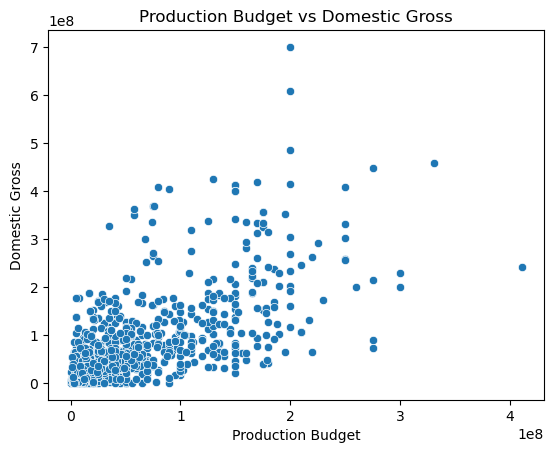

In [42]:
# Create a scatter plot of Production Budget vs Domestic Gross
sns.scatterplot(data=bom_movie_basic_rating_budget_df, x='production_budget', y='domestic_gross')

# Set the title and labels
plt.title('Production Budget vs Domestic Gross')
plt.xlabel('Production Budget')
plt.ylabel('Domestic Gross')

# Show the plot
plt.show()


The graph above is "production_budget" against "domestic_gross" to show the relationship between the high gross vs the movie budgets of the top grossing movies.

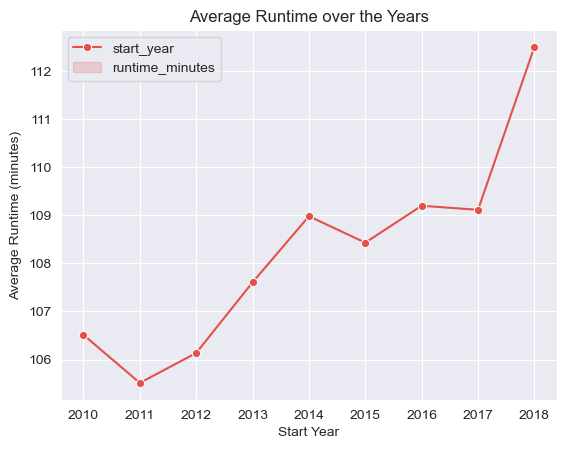

In [43]:
# Group the data by start year and calculate the average runtime
avg_runtime = bom_movie_basic_and_rating_df.groupby("start_year")["runtime_minutes"].mean().reset_index()

# Set the Seaborn style
sns.set_palette("Spectral")
sns.set_style("darkgrid")
# Create the line plot
sns.lineplot(x="start_year", y="runtime_minutes", data=avg_runtime, marker="o")

# Set labels and title
plt.xlabel("Start Year")
plt.ylabel("Average Runtime (minutes)")
plt.title("Average Runtime over the Years")
plt.legend(avg_runtime)
# Show the plot
plt.show()

The obove cell shows the average runtime for every year to show the trends over the years.


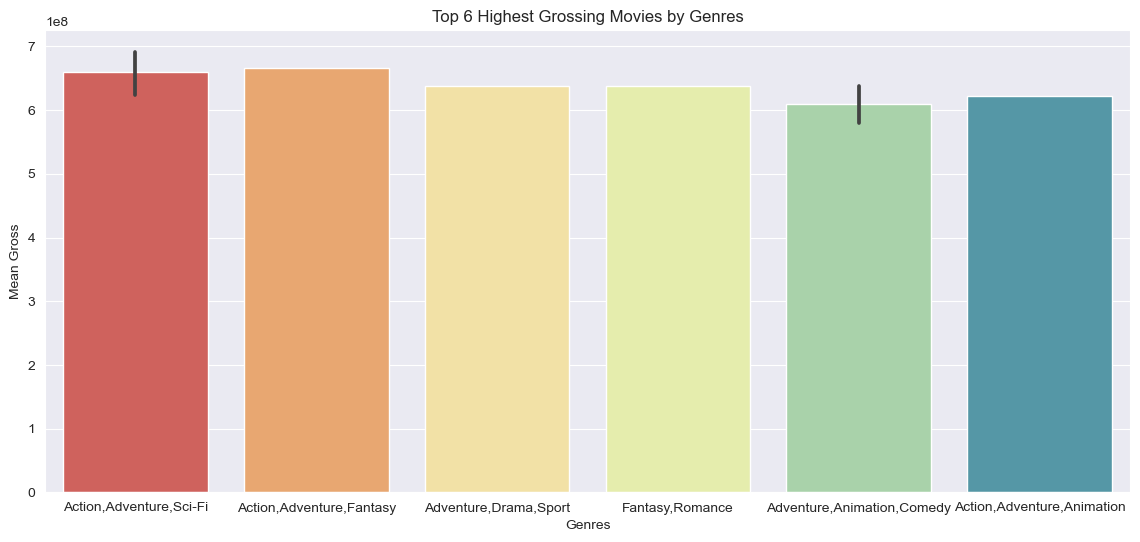

In [44]:
# Sort the dataframe by the mean gross column in descending order
sorted_df = bom_movie_basic_and_rating_df.sort_values('mean_gross', ascending=False)

# Select the top 10 highest grossing movies
top_10_movies = sorted_df.head(10)
# Set the Seaborn style
sns.set_palette("Spectral")
sns.set_style("darkgrid")

# Create a bar plot
plt.figure(figsize=(14, 6))
sns.barplot(x="genres", y="mean_gross", data=top_10_movies)

# Set the labels and title
plt.xlabel("Genres")
plt.ylabel("Mean Gross")
plt.title('Top 6 Highest Grossing Movies by Genres')

# Show the plot
plt.show()


The above graph shows the perfomance of the top 6 genres against the mean gross from both domestic and foreign gross.

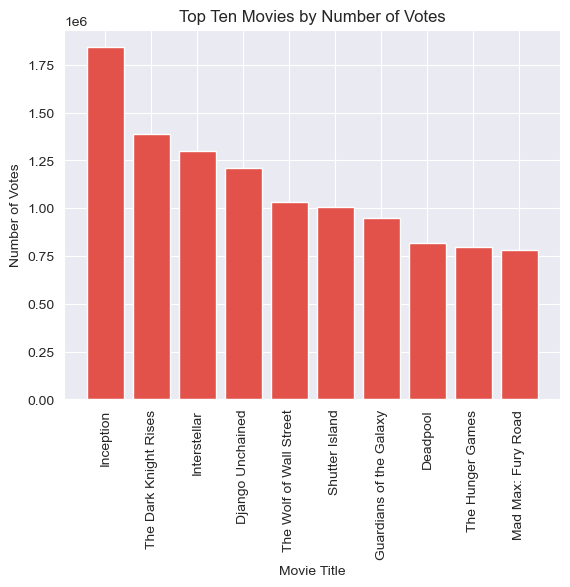

In [45]:
# Retrieve the top ten movies with the highest number of votes
top_ten_movies = bom_movie_basic_and_rating_df.nlargest(10, 'numvotes')

# Create a bar graph
plt.bar(top_ten_movies['primary_title'], top_ten_movies['numvotes'])

# Set labels and title
plt.xlabel('Movie Title')
plt.ylabel('Number of Votes')
plt.title('Top Ten Movies by Number of Votes')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the graph
plt.show()

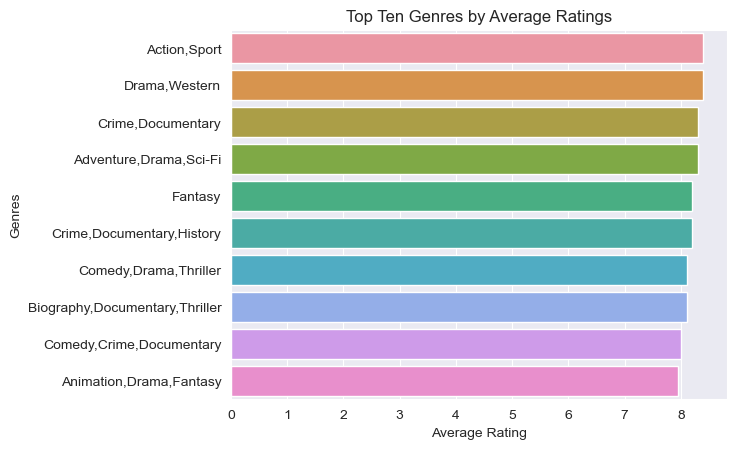

In [46]:
# Group the dataset by genres and calculate average ratings
genre_ratings = bom_movie_basic_and_rating_df.groupby('genres')['averagerating'].mean()

# Sort the genres by average ratings in descending order and select the top ten
top_ten_genres = genre_ratings.sort_values(ascending=False).head(10)

# Reset the index to convert the result to a DataFrame
top_ten_genres = top_ten_genres.reset_index()

# Create a bar graph
sns.barplot(data=top_ten_genres, x='averagerating', y='genres')

# Set labels and title
plt.xlabel('Average Rating')
plt.ylabel('Genres')
plt.title('Top Ten Genres by Average Ratings')

# Show the graph
plt.show()


The best perfoming genre by ratings is the adventure genre as by the above graph.

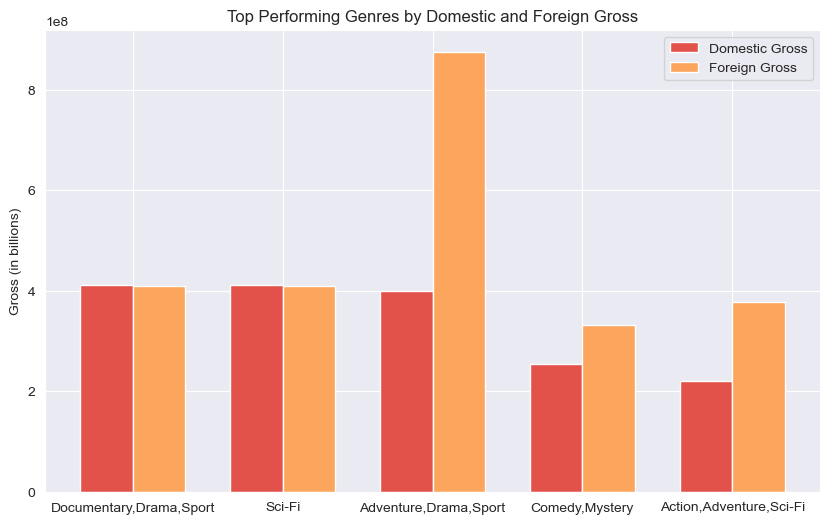

In [47]:

# Set the style and palette
sns.set_style('darkgrid')
sns.set_palette('Spectral')

# Create a bar graph
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(top_genres))

# Plot the domestic gross
ax.bar(index, top_genres['domestic_gross'], bar_width, label='Domestic Gross')
# Plot the foreign gross
ax.bar(index + bar_width, top_genres['foreign_gross'], bar_width, label='Foreign Gross')

# Set the x-axis ticks and labels
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(top_genres['genres'])

# Set the y-axis label
ax.set_ylabel('Gross (in billions)')

# Set the plot title
ax.set_title('Top Performing Genres by Domestic and Foreign Gross')

# Add a legend
ax.legend()

# Show the plot
plt.show()


From the above graph we can see the combined adventure,Drama and Sport genre did very well in the foreign market.

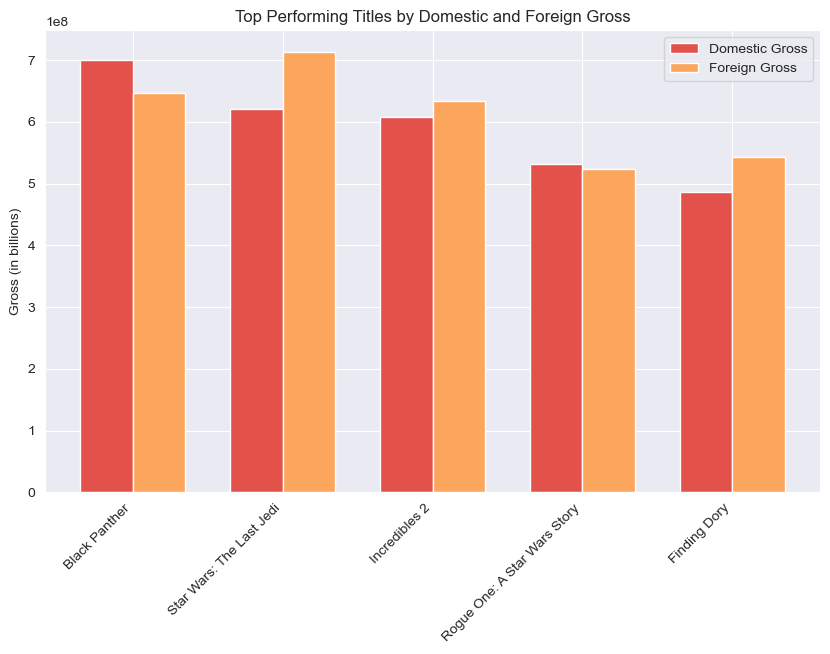

In [48]:
# Set the style and palette for the plot
sns.set_style("darkgrid")
sns.set_palette("Spectral")

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Define the bar width and index for the x-axis
bar_width = 0.35
index = np.arange(len(top_performing_titles))

# Create the bar plot for domestic gross
ax.bar(index, top_performing_titles['domestic_gross'], bar_width, label='Domestic Gross')

# Create the bar plot for foreign gross
ax.bar(index + bar_width, top_performing_titles['foreign_gross'], bar_width, label='Foreign Gross')

# Set the x-axis tick positions and labels
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(top_performing_titles['primary_title'], rotation=45, ha='right')

# Set the y-axis label
ax.set_ylabel('Gross (in billions)')

# Set the plot title
ax.set_title('Top Performing Titles by Domestic and Foreign Gross')

# Add a legend
ax.legend()

# Show the plot
plt.show()


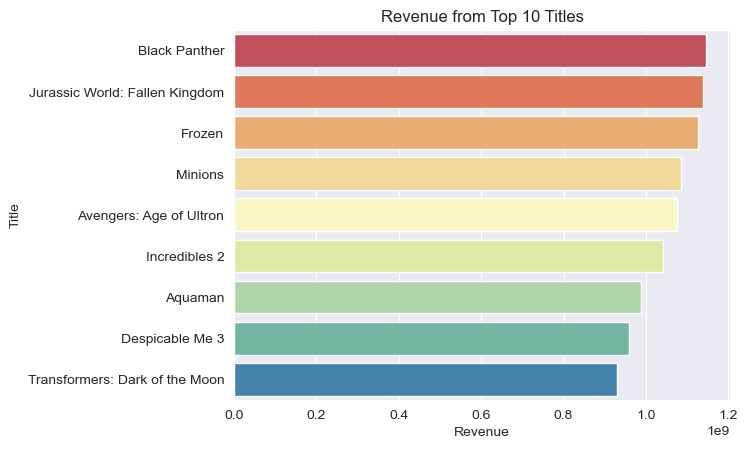

In [49]:
# Calculate the revenue by subtracting the production budget from the sum of domestic and foreign gross
bom_movie_basic_rating_budget_df['revenue'] = bom_movie_basic_rating_budget_df['domestic_gross'] + bom_movie_basic_rating_budget_df['foreign_gross'] - bom_movie_basic_rating_budget_df['production_budget']

# Sort the DataFrame by the revenue column in descending order and select the top 10 titles
top_titles = bom_movie_basic_rating_budget_df.nlargest(10, 'revenue')

# Create a bar plot for the top 10 titles and their revenue
sns.barplot(data=top_titles, x='revenue', y='primary_title', palette='Spectral')

# Set the plot title and labels
plt.title('Revenue from Top 10 Titles')
plt.xlabel('Revenue')
plt.ylabel('Title')

# Show the plot
plt.show()


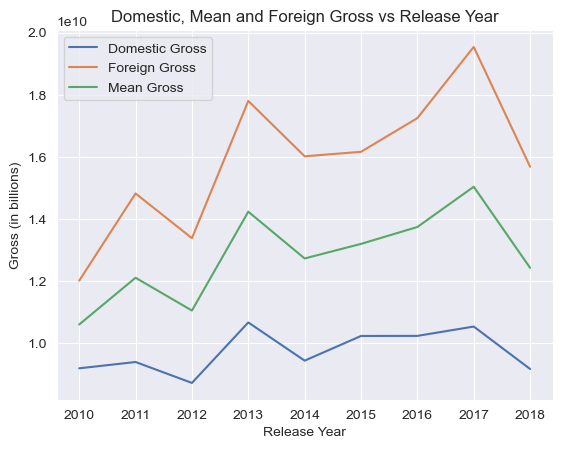

In [50]:
# Set the seaborn style and palette
sns.set_style("darkgrid")
sns.set_palette("deep")

# Group the data by release year and calculate the total domestic and foreign gross for each year
domestic_foreign_df = bom_movie_basic_and_rating_df.groupby('year').agg({"domestic_gross": "sum", "mean_gross": "sum","foreign_gross": "sum"})

# Reset the index to convert the 'year' column into a regular column
domestic_foreign_df = domestic_foreign_df.reset_index()

# Create the line plot for domestic gross
sns.lineplot(data=domestic_foreign_df, x='year', y='domestic_gross', label='Domestic Gross')

# Create the line plot for foreign gross
sns.lineplot(data=domestic_foreign_df, x='year', y='foreign_gross', label='Foreign Gross')

# Create the line plot for mean gross
sns.lineplot(data=domestic_foreign_df, x='year', y='mean_gross', label='Mean Gross')

# Set the plot title and labels
plt.title("Domestic, Mean and Foreign Gross vs Release Year")
plt.xlabel("Release Year")
plt.ylabel("Gross (in billions)")

# Show the plot
plt.show()


From the Domestic and Foreign Gross vs Release Year graph above, we can see the movies are more successful in the foreign market over the years than in the domestic market.

The genres that resonate well with audiences, the runtime preferences, and potentially uncovering any relationships between ratings, votes, and box office performance.

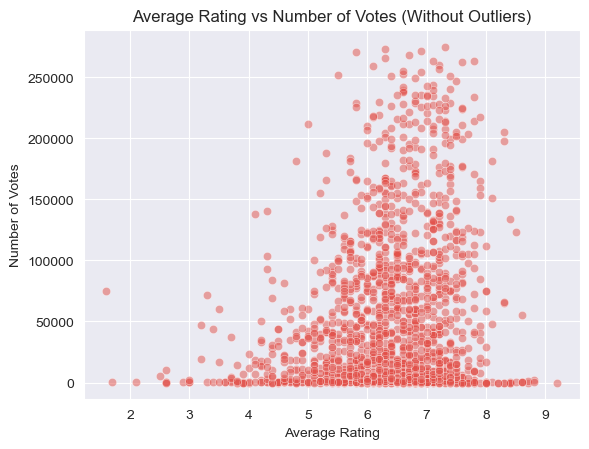

In [51]:
# Calculate the IQR
Q1 = np.percentile(bom_movie_basic_and_rating_df['numvotes'], 25)
Q3 = np.percentile(bom_movie_basic_and_rating_df['numvotes'], 75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
filtered_df = bom_movie_basic_and_rating_df[(bom_movie_basic_and_rating_df['numvotes'] >= lower_bound) & (bom_movie_basic_and_rating_df['numvotes'] <= upper_bound)]

# Set seaborn style
sns.set_style("darkgrid")
sns.set_palette("Spectral")
# Plotting the scatter plot of numvotes vs averagerating without outliers
sns.scatterplot(data=filtered_df, x='averagerating', y='numvotes', alpha=0.5)

# Set the plot title and labels
plt.title('Average Rating vs Number of Votes (Without Outliers)')
plt.xlabel('Average Rating')
plt.ylabel('Number of Votes')

# Display the plot
plt.show()

From the scatter plot above we see that movies with higher number of votes have a relatively higher average rating.

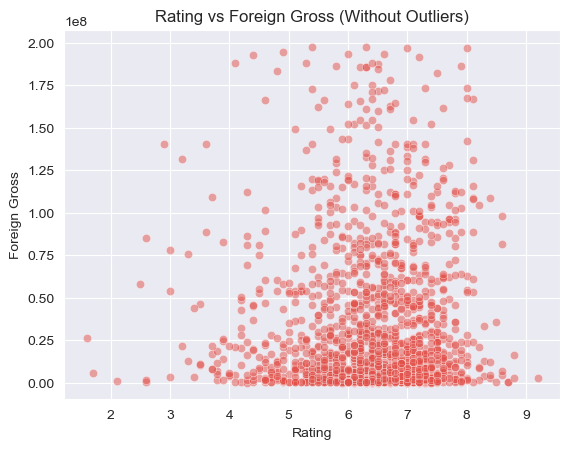

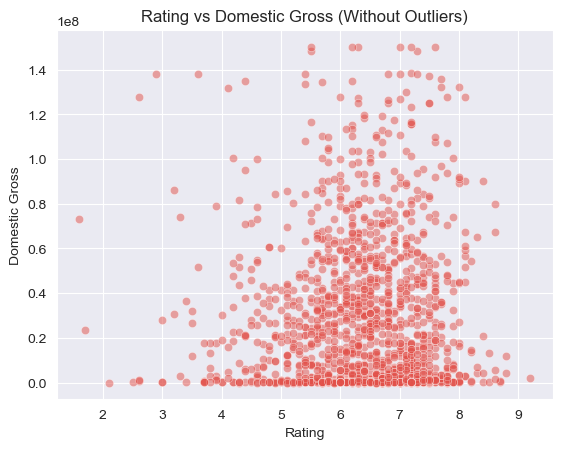

In [52]:
# Calculate the IQR for foreign gross and domestic gross
foreign_gross_Q1 = np.percentile(bom_movie_basic_and_rating_df['foreign_gross'], 25)
foreign_gross_Q3 = np.percentile(bom_movie_basic_and_rating_df['foreign_gross'], 75)
foreign_gross_IQR = foreign_gross_Q3 - foreign_gross_Q1

domestic_gross_Q1 = np.percentile(bom_movie_basic_and_rating_df['domestic_gross'], 25)
domestic_gross_Q3 = np.percentile(bom_movie_basic_and_rating_df['domestic_gross'], 75)
domestic_gross_IQR = domestic_gross_Q3 - domestic_gross_Q1

# Define the lower and upper bounds for outliers
foreign_gross_lower = foreign_gross_Q1 - 1.5 * foreign_gross_IQR
foreign_gross_upper = foreign_gross_Q3 + 1.5 * foreign_gross_IQR

domestic_gross_lower = domestic_gross_Q1 - 1.5 * domestic_gross_IQR
domestic_gross_upper = domestic_gross_Q3 + 1.5 * domestic_gross_IQR

# Filter the DataFrame to remove outliers
filtered_df = bom_movie_basic_and_rating_df[
    (bom_movie_basic_and_rating_df['foreign_gross'] >= foreign_gross_lower) &
    (bom_movie_basic_and_rating_df['foreign_gross'] <= foreign_gross_upper) &
    (bom_movie_basic_and_rating_df['domestic_gross'] >= domestic_gross_lower) &
    (bom_movie_basic_and_rating_df['domestic_gross'] <= domestic_gross_upper)
]

# Scatter plot for Rating vs Foreign Gross without outliers
sns.scatterplot(data=filtered_df, x='averagerating', y='foreign_gross', alpha=0.5)
plt.title('Rating vs Foreign Gross (Without Outliers)')
plt.xlabel('Rating')
plt.ylabel('Foreign Gross')
plt.show()

# Scatter plot for Rating vs Domestic Gross without outliers
sns.scatterplot(data=filtered_df, x='averagerating', y='domestic_gross', alpha=0.5)
plt.title('Rating vs Domestic Gross (Without Outliers)')
plt.xlabel('Rating')
plt.ylabel('Domestic Gross')
plt.show()


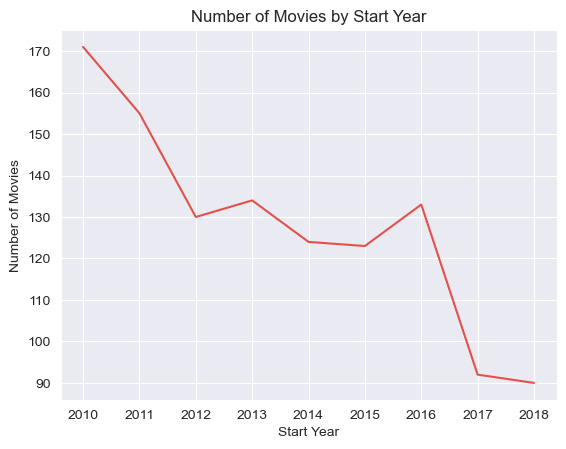

In [53]:
# Count the number of movies for each start year
movie_count_by_year = bom_movie_basic_rating_budget_df['start_year'].value_counts().reset_index()
movie_count_by_year.columns = ['start_year', 'movie_count']

# Sort the DataFrame by start year in ascending order
movie_count_by_year = movie_count_by_year.sort_values('start_year')

# Create a line plot for the number of movies against the start year
sns.lineplot(data=movie_count_by_year, x='start_year', y='movie_count')

# Set the plot title and labels
plt.title('Number of Movies by Start Year')
plt.xlabel('Start Year')
plt.ylabel('Number of Movies')

# Show the plot
plt.show()


The number of movies has dropped significantly over the years.

# Conclusion

The recommendations below align with Microsoft's goal of establishing a strong presence in the entertainment industry and maximizing the success of its movie ventures. By focusing on high-rated movies, expanding international distribution, and optimizing movie runtimes, Microsoft can enhance its competitive position and increase the likelihood of achieving positive business outcomes in the film industry.

As Microsoft lacks prior involvement in the movie industry and does not possess any existing movie intellectual property, they need to acquire IP from other studios. The selection of studios for Microsoft to purchase IP from will depend on their budgetary constraints.

# Recommendations

Based on the exploratory analysis of the provided data, here are three concrete business recommendations for Microsoft:

Invest in high-rated movies:
 
The analysis revealed a positive correlation between movie ratings and box office success. Microsoft should focus on producing and acquiring movies with higher average ratings. This can be achieved by investing in talented filmmakers, compelling scripts, and quality production to ensure the movies resonate well with the audience. By prioritizing high-rated movies, Microsoft can increase its chances of achieving better box office performance and profitability.

Expand international distribution: 

The analysis showed that foreign gross has a significant impact on the overall box office success of movies. Microsoft should consider expanding its international distribution efforts to capitalize on the global market. This can involve strategic partnerships with international distributors, localization of content to cater to specific regions, and targeted marketing campaigns to reach a wider audience. By tapping into international markets, Microsoft can maximize its revenue potential and global presence.

Optimize movie runtime: 

The analysis revealed that the average runtime of movies has been decreasing over the years. Microsoft should carefully consider the optimal runtime of their movies based on audience preferences and market trends. While shorter runtimes may cater to modern viewers' shorter attention spans, it's important to strike a balance between engaging storytelling and meeting audience expectations. By optimizing movie runtimes, Microsoft can deliver more captivating and well-paced movies that have a higher chance of resonating with the audience.